In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/BIPA_data.csv', index_col=0)
data

,gameId,createDate,tierRank,position,teamId,summonerId,championId,result,level,championsKilled,...,totalDamageTaken,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version
0,5383880006,2021-08-11 06:59:31,P318,S,200,3210877,99,WIN,10,4,...,3602,0,0,11,2830,2181,2181,NONE,972,11.16.390.1945
1,5383880006,2021-08-11 06:59:31,P466,S,100,7550211,35,LOSE,8,1,...,5077,0,2,24,2013,0,0,NONE,972,11.16.390.1945
2,5383880006,2021-08-11 06:59:31,P329,M,200,9306696,266,WIN,11,5,...,11029,0,0,15,6158,585,585,NONE,972,11.16.390.1945
3,5383880006,2021-08-11 06:59:31,P461,T,200,20281103,92,WIN,11,8,...,9944,0,0,10,7615,2318,2318,NONE,972,11.16.390.1945
4,5383880006,2021-08-11 06:59:31,P30,A,200,26082075,22,WIN,10,3,...,6387,0,0,13,3218,2370,2370,NONE,972,11.16.390.1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,5384659633,2021-08-11 17:20:44,S146,S,100,21560397,53,WIN,15,1,...,32961,0,0,63,34725,1978,126,BOTTOM,2379,11.16.390.1945
999996,5384659633,2021-08-11 17:20:44,G442,M,100,46320531,166,WIN,18,10,...,24674,1,16,16,21371,8406,7042,MIDDLE,2379,11.16.390.1945
999997,5384659633,2021-08-11 17:20:44,G418,J,200,64820251,64,LOSE,17,5,...,45911,6,68,22,62426,20292,454,JUNGLE,2379,11.16.390.1945
999998,5384659633,2021-08-11 17:20:44,S178,A,100,72310857,81,WIN,17,6,...,28187,8,9,17,19664,11090,1062,BOTTOM,2379,11.16.390.1945


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   gameId                           1000000 non-null  int64 
 1   createDate                       1000000 non-null  object
 2   tierRank                         977141 non-null   object
 3   position                         1000000 non-null  object
 4   teamId                           1000000 non-null  int64 
 5   summonerId                       1000000 non-null  int64 
 6   championId                       1000000 non-null  int64 
 7   result                           1000000 non-null  object
 8   level                            1000000 non-null  int64 
 9   championsKilled                  1000000 non-null  int64 
 10  numDeaths                        1000000 non-null  int64 
 11  assists                          1000000 non-null  int64 
 12  n

In [140]:
data['gameLength']

190

In [147]:
b = data[data['wardPlaced'] > 100][['gameLength','tierRank','wardPlaced', 'result']].sort_values('wardPlaced')
b['gameLength'] = b['gameLength'] /60
b['ward_time'] = b['wardPlaced']/b['gameLength']
b

,gameLength,tierRank,wardPlaced,result,ward_time
205759,19.800000,G331,101,LOSE,5.101010
698921,28.266667,G484,102,LOSE,3.608491
908452,38.150000,C11071,102,LOSE,2.673657
277841,23.350000,S431,102,LOSE,4.368308
120881,44.250000,P190,103,LOSE,2.327684
378124,47.183333,G40,104,WIN,2.204168
538785,39.483333,R1710,105,LOSE,2.659350
787215,42.316667,P40,105,LOSE,2.481292
165657,19.066667,P110,107,LOSE,5.611888
64639,27.600000,S275,111,LOSE,4.021739


<BarContainer object of 38 artists>

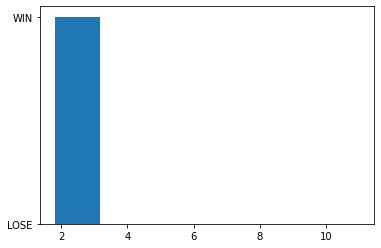

# 와드와 승률의 관계

In [4]:
data.columns

Index(['gameId', 'createDate', 'tierRank', 'position', 'teamId', 'summonerId',
       'championId', 'result', 'level', 'championsKilled', 'numDeaths',
       'assists', 'neutralMinionsKilled', 'turretsKilled', 'barracksKilled',
       'minionsKilled', 'goldEarned', 'physicalDamageDealtToChampions',
       'magicDamageDealtPlayer', 'physicalDamageTaken',
       'sightWardsBoughtInGame', 'visionWardsBoughtInGame', 'wardKilled',
       'wardPlaced', 'totalHeal', 'totalDamageDealtToChampions',
       'totalDamageDealt', 'totalDamageTaken',
       'neutralMinionsKilledEnemyJungle', 'neutralMinionsKilledTeamJungle',
       'visionScore', 'damageSelfMitigated', 'damageDealtToObjectives',
       'damageDealtToTurrets', 'lane', 'gameLength', 'version'],
      dtype='object')

In [3]:
ward_win_data = data[['wardPlaced', 'result']]
ward_win_data['result']

0          WIN
1         LOSE
2          WIN
3          WIN
4          WIN
          ... 
999995     WIN
999996     WIN
999997    LOSE
999998     WIN
999999     WIN
Name: result, Length: 1000000, dtype: object

In [4]:
ward_win_data.sort_values('wardPlaced', ascending=False)[:60]

,wardPlaced,result
39801,226,LOSE
936551,194,LOSE
858269,190,LOSE
434618,173,LOSE
446318,163,LOSE
936017,148,LOSE
190432,142,LOSE
763959,141,LOSE
645649,136,LOSE
99219,136,LOSE


In [5]:
# 값이 UNKNOWN 인 값들 제거해주기
a = ward_win_data[ward_win_data['result'] == 'UNKNOWN'].index
ward_win_data2 = ward_win_data.drop(index = a)
ward_win_data2.reset_index(drop=True)

,wardPlaced,result
0,5,WIN
1,6,LOSE
2,7,WIN
3,5,WIN
4,5,WIN
...,...,...
986025,29,WIN
986026,8,WIN
986027,13,LOSE
986028,11,WIN


In [6]:
ward_win_data2['result'] = (ward_win_data2['result']  =='WIN')

In [7]:
ward_win_data2

,wardPlaced,result
0,5,True
1,6,False
2,7,True
3,5,True
4,5,True
...,...,...
999995,29,True
999996,8,True
999997,13,False
999998,11,True


In [8]:
ward_win_data3 = ward_win_data2.groupby('wardPlaced', as_index= False).count()
ward_win_data4 = ward_win_data2.groupby('wardPlaced', as_index= False).sum()

In [9]:
ward_win_data4

,wardPlaced,result
0,0,3587
1,1,8706
2,2,16942
3,3,27605
4,4,37424
...,...,...
122,163,0
123,173,0
124,190,0
125,194,0


In [10]:
ward_win_data5 = ward_win_data3.merge(ward_win_data4, on='wardPlaced')
ward_win_data5['WIN_RATE'] = ward_win_data5['result_y']/ward_win_data5['result_x']

In [11]:
ward_win_data5= ward_win_data5[['wardPlaced', 'WIN_RATE']]

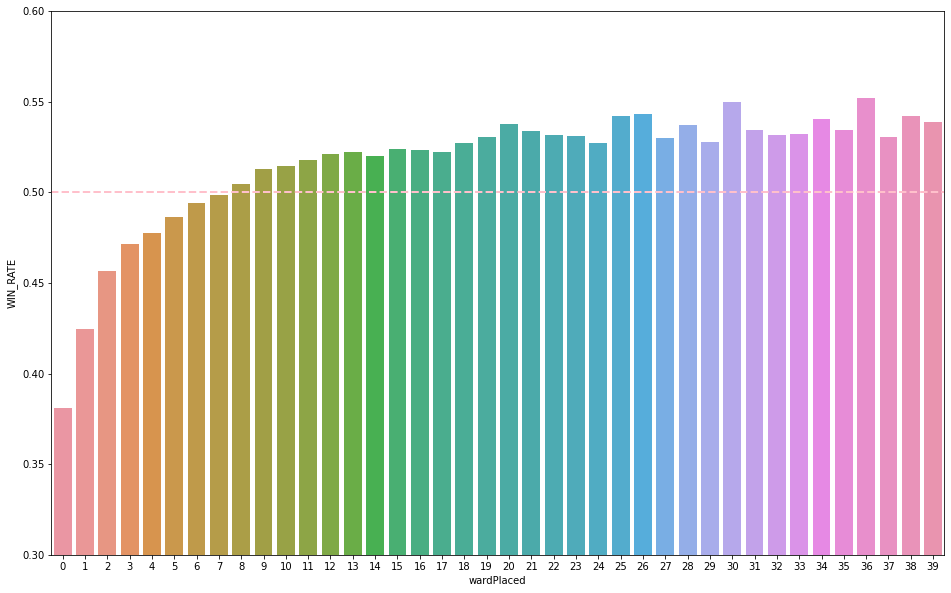

In [14]:
flg, ax = plt.subplots(figsize = (16,10))
sns.barplot(data=ward_win_data5[:40], x= 'wardPlaced', y='WIN_RATE')
# sns.barplot(data=ward_win_data5[40:], x= 'wardPlaced', y='WIN_RATE')

# 리미트 설정
ax.set_ylim(0.3,0.6)

# 라인 표시
win_mean = ward_win_data5['WIN_RATE'].mean()
ax.axhline(0.5, ls= '--', lw = 2, color = 'pink')

plt.show()

NameError: name 'b' is not defined

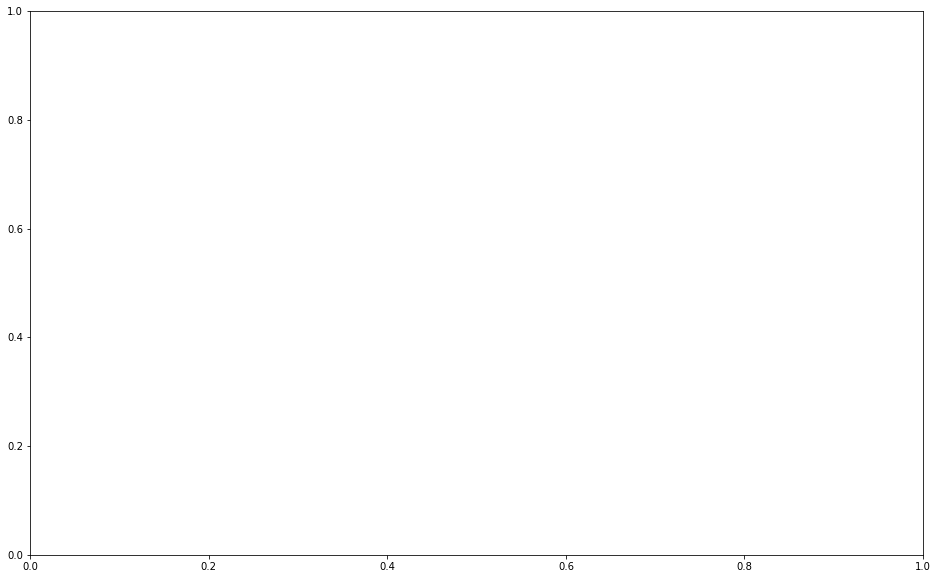

In [13]:
flg, ax = plt.subplots(figsize = (16,10))

sns.barplot(data=b, x= 'result', y='ward_time')

array([<AxesSubplot:title={'center':'LOSE'}>,
       <AxesSubplot:title={'center':'WIN'}>], dtype=object)

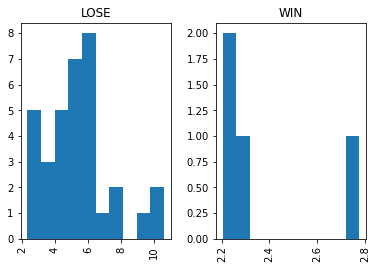

In [164]:
b[['ward_time','result']].hist( by = 'result' )


In [172]:
data2 = data[['gameLength','tierRank','wardPlaced', 'result']]
data2['gameLength'] =data2['gameLength'] /60
data2['ward_time'] =data2['wardPlaced']/data2['gameLength']
data2

<ipython-input-172-e080094dcf57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['gameLength'] =data2['gameLength'] /60
<ipython-input-172-e080094dcf57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['ward_time'] =data2['wardPlaced']/data2['gameLength']


,gameLength,tierRank,wardPlaced,result,ward_time
0,16.20,P318,5,WIN,0.308642
1,16.20,P466,6,LOSE,0.370370
2,16.20,P329,7,WIN,0.432099
3,16.20,P461,5,WIN,0.308642
4,16.20,P30,5,WIN,0.308642
...,...,...,...,...,...
999995,39.65,S146,29,WIN,0.731400
999996,39.65,G442,8,WIN,0.201765
999997,39.65,G418,13,LOSE,0.327869
999998,39.65,S178,11,WIN,0.277427


array([[<AxesSubplot:title={'center':'LOSE'}>,
        <AxesSubplot:title={'center':'UNKNOWN'}>],
       [<AxesSubplot:title={'center':'WIN'}>, <AxesSubplot:>]],
      dtype=object)

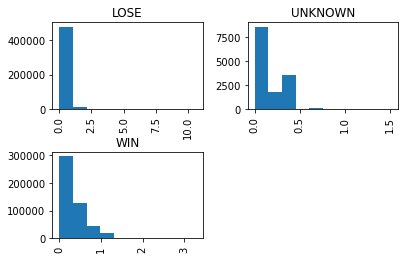

In [173]:
data2[['ward_time','result']].hist( by = 'result' )

In [179]:
data2 = data[['gameLength','tierRank','wardPlaced', 'result','visionScore']]
data2['gameLength'] =data2['gameLength'] /60
data2['ward_time'] =data2['wardPlaced']/data2['gameLength']
data2

<ipython-input-179-3c9221a2d050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['gameLength'] =data2['gameLength'] /60
<ipython-input-179-3c9221a2d050>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['ward_time'] =data2['wardPlaced']/data2['gameLength']


,gameLength,tierRank,wardPlaced,result,visionScore,ward_time
0,16.20,P318,5,WIN,11,0.308642
1,16.20,P466,6,LOSE,24,0.370370
2,16.20,P329,7,WIN,15,0.432099
3,16.20,P461,5,WIN,10,0.308642
4,16.20,P30,5,WIN,13,0.308642
...,...,...,...,...,...,...
999995,39.65,S146,29,WIN,63,0.731400
999996,39.65,G442,8,WIN,16,0.201765
999997,39.65,G418,13,LOSE,22,0.327869
999998,39.65,S178,11,WIN,17,0.277427


In [182]:
data.groupby('gameId')

In [185]:
data.columns

Index(['gameId', 'createDate', 'tierRank', 'position', 'teamId', 'summonerId',
       'championId', 'result', 'level', 'championsKilled', 'numDeaths',
       'assists', 'neutralMinionsKilled', 'turretsKilled', 'barracksKilled',
       'minionsKilled', 'goldEarned', 'physicalDamageDealtToChampions',
       'magicDamageDealtPlayer', 'physicalDamageTaken',
       'sightWardsBoughtInGame', 'visionWardsBoughtInGame', 'wardKilled',
       'wardPlaced', 'totalHeal', 'totalDamageDealtToChampions',
       'totalDamageDealt', 'totalDamageTaken',
       'neutralMinionsKilledEnemyJungle', 'neutralMinionsKilledTeamJungle',
       'visionScore', 'damageSelfMitigated', 'damageDealtToObjectives',
       'damageDealtToTurrets', 'lane', 'gameLength', 'version'],
      dtype='object')

In [198]:
data3 = data[['gameId', 'tierRank', 'teamId', 'result', 'visionScore','wardPlaced' ]]
data3['result']= (data3['result'] == 'WIN')
data3

<ipython-input-198-ee75d9697ce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['result']= (data3['result'] == 'WIN')


,gameId,tierRank,teamId,result,visionScore,wardPlaced
0,5383880006,P318,200,True,11,5
1,5383880006,P466,100,False,24,6
2,5383880006,P329,200,True,15,7
3,5383880006,P461,200,True,10,5
4,5383880006,P30,200,True,13,5
...,...,...,...,...,...,...
999995,5384659633,S146,100,True,63,29
999996,5384659633,G442,100,True,16,8
999997,5384659633,G418,200,False,22,13
999998,5384659633,S178,100,True,17,11


In [232]:
data4 = data3[['visionScore', 'wardPlaced','teamId','result','gameId']].groupby(['gameId','teamId'], as_index=False).sum()
data4

,gameId,teamId,visionScore,wardPlaced,result
0,5383880006,100,74,30,0
1,5383880006,200,62,28,5
2,5383880007,100,69,27,5
3,5383880007,200,52,30,0
4,5383880016,100,116,41,5
...,...,...,...,...,...
199995,5384659624,200,169,66,0
199996,5384659628,100,139,59,0
199997,5384659628,200,150,63,5
199998,5384659633,100,157,69,5
